imports

In [148]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings("ignore")

df = pd.read_csv("/Users/sandeepsrinivasdwaram/Desktop/bmi_project/bmi_data.csv")

The history saving thread hit an unexpected error (OperationalError('attempt to write a readonly database')).History will not be written to the database.


In [149]:
df

,Unnamed: 0,SchoolYear,NameHospital,Sex,EpiUnderweight,EpiHealthyWeight,EpiOverweight,EpiObese,EpiOverweightAndObese,ValidCounts,UnvalidCounts,TotalCounts,year,%ValidCounts,%UnValidCounts
0,0,2001-01-01,Borders,Female,2,334,54,28,82,418,82,500,2001,83.600000,16.400000
1,1,2001-01-01,Borders,Male,5,301,63,42,105,411,105,516,2001,79.651163,20.348837
2,2,2001-01-01,Lothian,Female,12,728,133,106,239,979,239,1218,2001,80.377668,19.622332
3,3,2001-01-01,Lothian,Male,17,681,124,114,238,936,238,1174,2001,79.727428,20.272572
4,4,2001-01-01,Fife,Female,17,1361,231,155,386,1764,386,2150,2001,82.046512,17.953488
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
511,511,2023-01-01,Tayside,Male,15,1201,216,178,394,1610,394,2004,2023,80.339321,19.660679
512,512,2023-01-01,Greater Glasgow and Clyde,Female,34,4097,595,561,1156,5287,1156,6443,2023,82.058047,17.941953
513,513,2023-01-01,Greater Glasgow and Clyde,Male,89,4152,615,641,1256,5497,1256,6753,2023,81.400859,18.599141
514,514,2023-01-01,Lanarkshire,Female,14,2255,381,330,711,2980,711,3691,2023,80.736928,19.263072


In [150]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 516 entries, 0 to 515
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Unnamed: 0             516 non-null    int64  
 1   SchoolYear             516 non-null    object 
 2   NameHospital           516 non-null    object 
 3   Sex                    516 non-null    object 
 4   EpiUnderweight         516 non-null    int64  
 5   EpiHealthyWeight       516 non-null    int64  
 6   EpiOverweight          516 non-null    int64  
 7   EpiObese               516 non-null    int64  
 8   EpiOverweightAndObese  516 non-null    int64  
 9   ValidCounts            516 non-null    int64  
 10  UnvalidCounts          516 non-null    int64  
 11  TotalCounts            516 non-null    int64  
 12  year                   516 non-null    int64  
 13  %ValidCounts           516 non-null    float64
 14  %UnValidCounts         516 non-null    float64
dtypes: flo

In [151]:
df = df.drop(['Unnamed: 0'], axis=1)

In [152]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 516 entries, 0 to 515
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   SchoolYear             516 non-null    object 
 1   NameHospital           516 non-null    object 
 2   Sex                    516 non-null    object 
 3   EpiUnderweight         516 non-null    int64  
 4   EpiHealthyWeight       516 non-null    int64  
 5   EpiOverweight          516 non-null    int64  
 6   EpiObese               516 non-null    int64  
 7   EpiOverweightAndObese  516 non-null    int64  
 8   ValidCounts            516 non-null    int64  
 9   UnvalidCounts          516 non-null    int64  
 10  TotalCounts            516 non-null    int64  
 11  year                   516 non-null    int64  
 12  %ValidCounts           516 non-null    float64
 13  %UnValidCounts         516 non-null    float64
dtypes: float64(2), int64(9), object(3)
memory usage: 56.6+ KB


In [153]:
df.head(10)

,SchoolYear,NameHospital,Sex,EpiUnderweight,EpiHealthyWeight,EpiOverweight,EpiObese,EpiOverweightAndObese,ValidCounts,UnvalidCounts,TotalCounts,year,%ValidCounts,%UnValidCounts
0,2001-01-01,Borders,Female,2,334,54,28,82,418,82,500,2001,83.600000,16.400000
1,2001-01-01,Borders,Male,5,301,63,42,105,411,105,516,2001,79.651163,20.348837
2,2001-01-01,Lothian,Female,12,728,133,106,239,979,239,1218,2001,80.377668,19.622332
3,2001-01-01,Lothian,Male,17,681,124,114,238,936,238,1174,2001,79.727428,20.272572
4,2001-01-01,Fife,Female,17,1361,231,155,386,1764,386,2150,2001,82.046512,17.953488
5,2001-01-01,Fife,Male,24,1365,244,219,463,1852,463,2315,2001,80.000000,20.000000
6,2001-01-01,Lanarkshire,Female,57,2280,319,287,606,2943,606,3549,2001,82.924768,17.075232
7,2001-01-01,Lanarkshire,Male,72,2231,347,281,628,2931,628,3559,2001,82.354594,17.645406
8,2002-01-01,Lothian,Female,10,634,125,107,232,876,232,1108,2002,79.061372,20.938628
9,2002-01-01,Lothian,Male,23,611,126,105,231,865,231,1096,2002,78.923358,21.076642


Clustering Analysis - group hospitals or children based on BMI trends

Select Relevant Features for Clustering

In [154]:
# Selecting relevant columns
features = ['EpiUnderweight', 'EpiHealthyWeight', 'EpiOverweight', 'EpiObese', 'EpiOverweightAndObese']
X = df[features]


In [155]:
X

,EpiUnderweight,EpiHealthyWeight,EpiOverweight,EpiObese,EpiOverweightAndObese
0,2,334,54,28,82
1,5,301,63,42,105
2,12,728,133,106,239
3,17,681,124,114,238
4,17,1361,231,155,386
...,...,...,...,...,...
511,15,1201,216,178,394
512,34,4097,595,561,1156
513,89,4152,615,641,1256
514,14,2255,381,330,711


Normalize the Data

In [156]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

Determine the Optimal Number of Clusters - Elbow Method

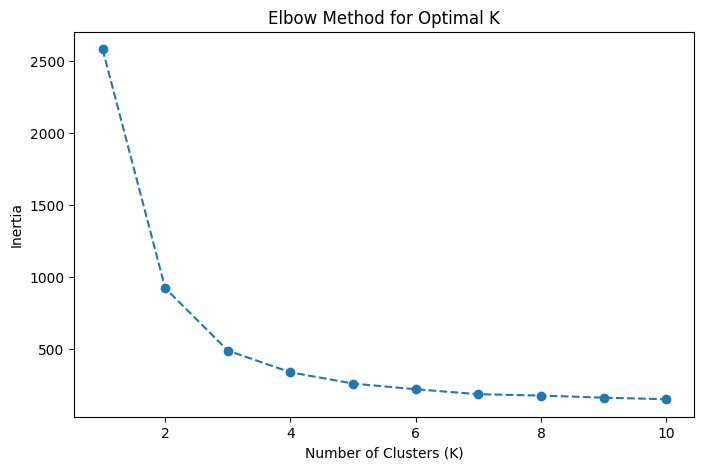

In [157]:
inertia = []
K_range = range(1, 11)

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

# Plot Elbow Curve
plt.figure(figsize=(8, 5))
plt.plot(K_range, inertia, marker='o', linestyle='--')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal K')
plt.show()

Perform K-Means Clustering

In [158]:
# Apply K-Means with optimal K (assume elbow found K=3)
kmeans = KMeans(n_clusters=3, random_state=42)
df['Cluster'] = kmeans.fit_predict(X_scaled)


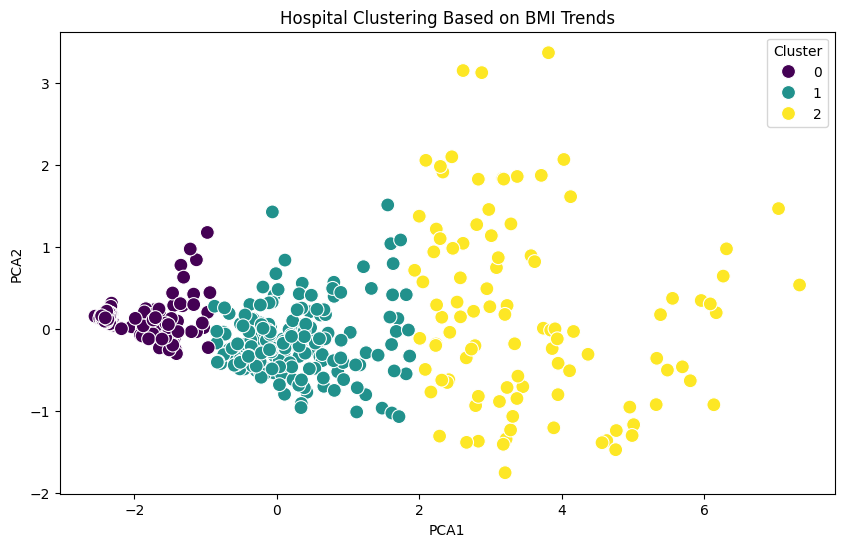

In [159]:
from sklearn.decomposition import PCA

# Reduce dimensions to 2D for visualization
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Add PCA components to DataFrame
df['PCA1'] = X_pca[:, 0]
df['PCA2'] = X_pca[:, 1]

# Scatter plot for clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(x=df['PCA1'], y=df['PCA2'], hue=df['Cluster'], palette='viridis', s=100)
plt.title('Hospital Clustering Based on BMI Trends')
plt.show()


In [160]:
cluster_summary = df.groupby('Cluster')[features].mean()
print(cluster_summary)


         EpiUnderweight  EpiHealthyWeight  EpiOverweight    EpiObese  \
Cluster                                                                
0              4.035533        277.944162      47.065990   37.614213   
1             19.720183       1397.073394     231.330275  191.114679   
2             60.643564       3108.108911     472.069307  411.069307   

         EpiOverweightAndObese  
Cluster                         
0                    84.680203  
1                   422.444954  
2                   883.138614  


Outlier Detection

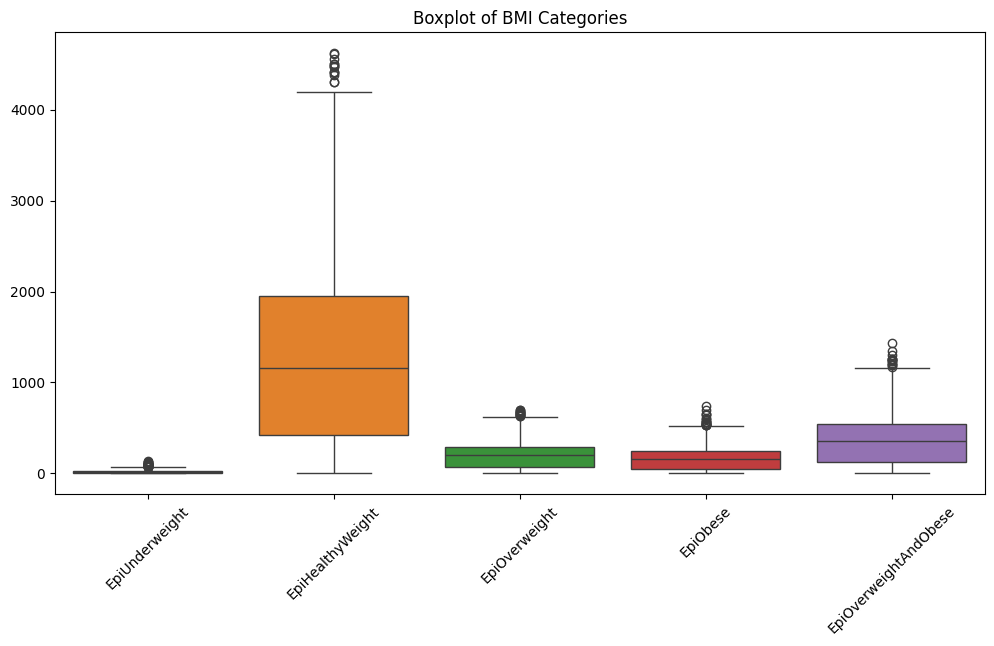

In [161]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=X)
plt.xticks(rotation=45)
plt.title('Boxplot of BMI Categories')
plt.show()


In [162]:
# Detecting outliers using IQR method
Q1 = X.quantile(0.25)
Q3 = X.quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = (X < lower_bound) | (X > upper_bound)

# Count the number of outliers per column
outlier_counts = outliers.sum()
print("Outliers per column:\n", outlier_counts)


Outliers per column:
 EpiUnderweight           34
EpiHealthyWeight         14
EpiOverweight            14
EpiObese                 19
EpiOverweightAndObese    14
dtype: int64


In [163]:
from scipy.stats import zscore

# Calculate Z-scores
z_scores = np.abs(zscore(X))

# Define threshold (typically 3)
threshold = 3

# Find outliers
outliers_zscore = (z_scores > threshold).sum(axis=0)
print("Outliers detected using Z-score:\n", outliers_zscore)


Outliers detected using Z-score:
 EpiUnderweight           11
EpiHealthyWeight          1
EpiOverweight             0
EpiObese                  5
EpiOverweightAndObese     2
dtype: int64


In [164]:
from sklearn.ensemble import IsolationForest

# Initialize model
iso_forest = IsolationForest(contamination=0.05, random_state=42)  # 5% outliers

# Fit model
df["Outlier"] = iso_forest.fit_predict(X)

# Outliers are labeled as -1
outlier_hospitals = df[df["Outlier"] == -1]
print("Number of detected outliers:", len(outlier_hospitals))
print(outlier_hospitals[['NameHospital', 'EpiUnderweight', 'EpiObese']])


Number of detected outliers: 26
                  NameHospital  EpiUnderweight  EpiObese
119                Lanarkshire             122       261
173                Lanarkshire             120       258
198  Greater Glasgow and Clyde              35       517
199  Greater Glasgow and Clyde              67       568
201                Lanarkshire             137       339
226  Greater Glasgow and Clyde              52       542
227  Greater Glasgow and Clyde              88       534
254  Greater Glasgow and Clyde              43       483
255  Greater Glasgow and Clyde              98       593
283  Greater Glasgow and Clyde             106       516
311  Greater Glasgow and Clyde              78       545
338  Greater Glasgow and Clyde              34       533
339  Greater Glasgow and Clyde              85       538
366  Greater Glasgow and Clyde              40       500
367  Greater Glasgow and Clyde              87       589
423                    Lothian              31       531

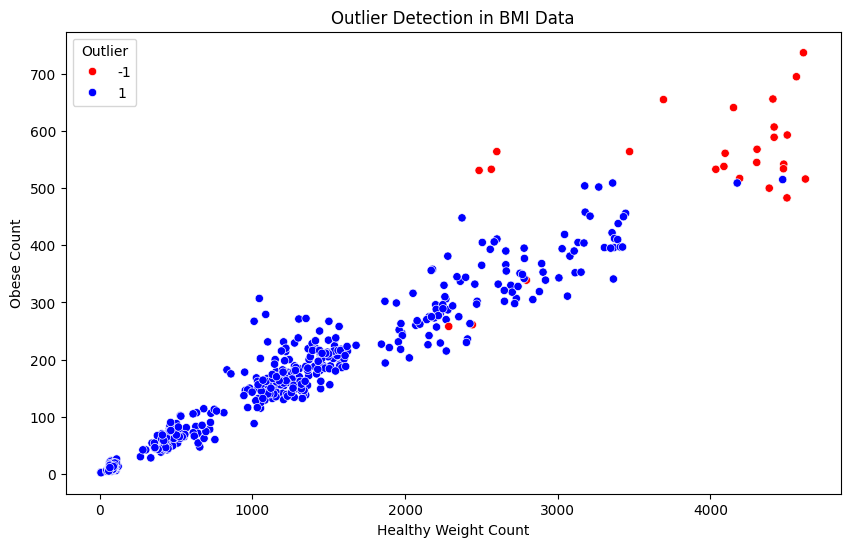

In [165]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x=df['EpiHealthyWeight'], y=df['EpiObese'], hue=df['Outlier'], palette={1: 'blue', -1: 'red'})
plt.title("Outlier Detection in BMI Data")
plt.xlabel("Healthy Weight Count")
plt.ylabel("Obese Count")
plt.show()


In [166]:
def classify_bmi(row):
    categories = ['EpiUnderweight', 'EpiHealthyWeight', 'EpiOverweight', 'EpiObese']
    return categories[np.argmax(row[categories].values)]

df['BMI_Category'] = df.apply(classify_bmi, axis=1)
print(df['BMI_Category'].value_counts())  # Check class distribution


BMI_Category
EpiHealthyWeight    516
Name: count, dtype: int64


In [167]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

In [168]:
encoder = LabelEncoder()
df['Sex'] = encoder.fit_transform(df['Sex'])  # Male=1, Female=0
df['BMI_Category'] = encoder.fit_transform(df['BMI_Category'])  # Encode target variable

In [169]:
X = df[['Sex', 'EpiUnderweight', 'EpiHealthyWeight', 'EpiOverweight', 'EpiObese']]
y = df['BMI_Category']

In [170]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [171]:
print("Training data size:", X_train.shape)

Training data size: (412, 5)


In [172]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report

In [173]:
clf = DecisionTreeClassifier(max_depth=4, random_state=42)
clf.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=4, random_state=42)

In [174]:
y_pred = clf.predict(X_test)

In [175]:
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy: 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       104

    accuracy                           1.00       104
   macro avg       1.00      1.00      1.00       104
weighted avg       1.00      1.00      1.00       104



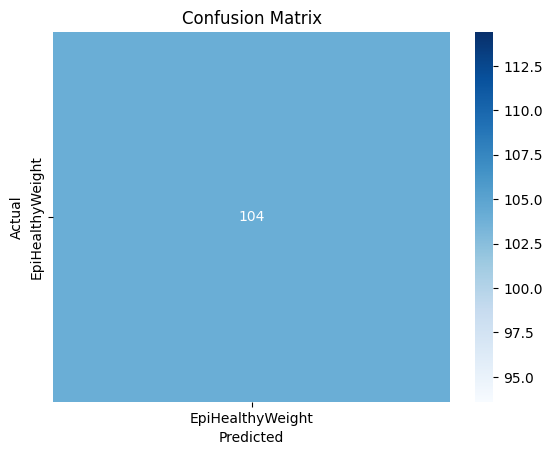

In [176]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=encoder.classes_, yticklabels=encoder.classes_)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

In [177]:
from sklearn.preprocessing import StandardScaler

# Select relevant numerical features
features = ['EpiUnderweight', 'EpiHealthyWeight', 'EpiOverweight', 'EpiObese']

# Standardize data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df[features])


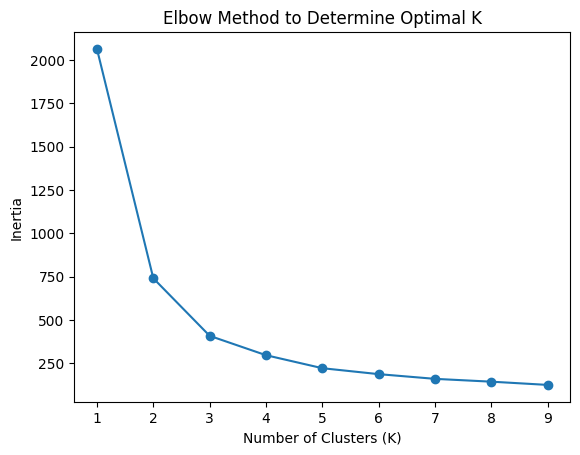

In [178]:
from sklearn.cluster import KMeans

# Find optimal K
inertia = []
for k in range(1, 10):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

# Plot Elbow Curve
plt.plot(range(1, 10), inertia, marker='o')
plt.xlabel("Number of Clusters (K)")
plt.ylabel("Inertia")
plt.title("Elbow Method to Determine Optimal K")
plt.show()


In [179]:
# Train K-Means with optimal K (choose from Elbow Method)
kmeans = KMeans(n_clusters=3, random_state=42)
df['Cluster'] = kmeans.fit_predict(X_scaled)

# Show hospital clusters
print(df[['NameHospital', 'Cluster']].head())


  NameHospital  Cluster
0      Borders        0
1      Borders        0
2      Lothian        0
3      Lothian        0
4         Fife        1


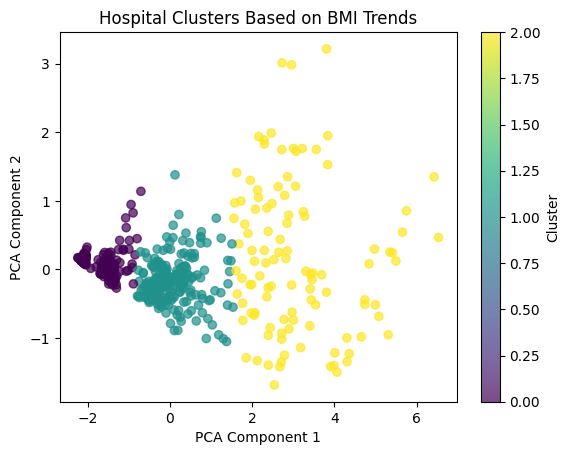

In [180]:
from sklearn.decomposition import PCA

# Reduce to 2D for visualization
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Plot clusters
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=df['Cluster'], cmap='viridis', alpha=0.7)
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.title("Hospital Clusters Based on BMI Trends")
plt.colorbar(label="Cluster")
plt.show()

In [181]:
df.groupby("Cluster")[['EpiUnderweight', 'EpiObese']].mean()


,EpiUnderweight,EpiObese
Cluster,,
0,4.035533,37.614213
1,18.611374,188.772512
2,60.157407,401.388889


In [182]:
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
from sklearn.preprocessing import StandardScaler

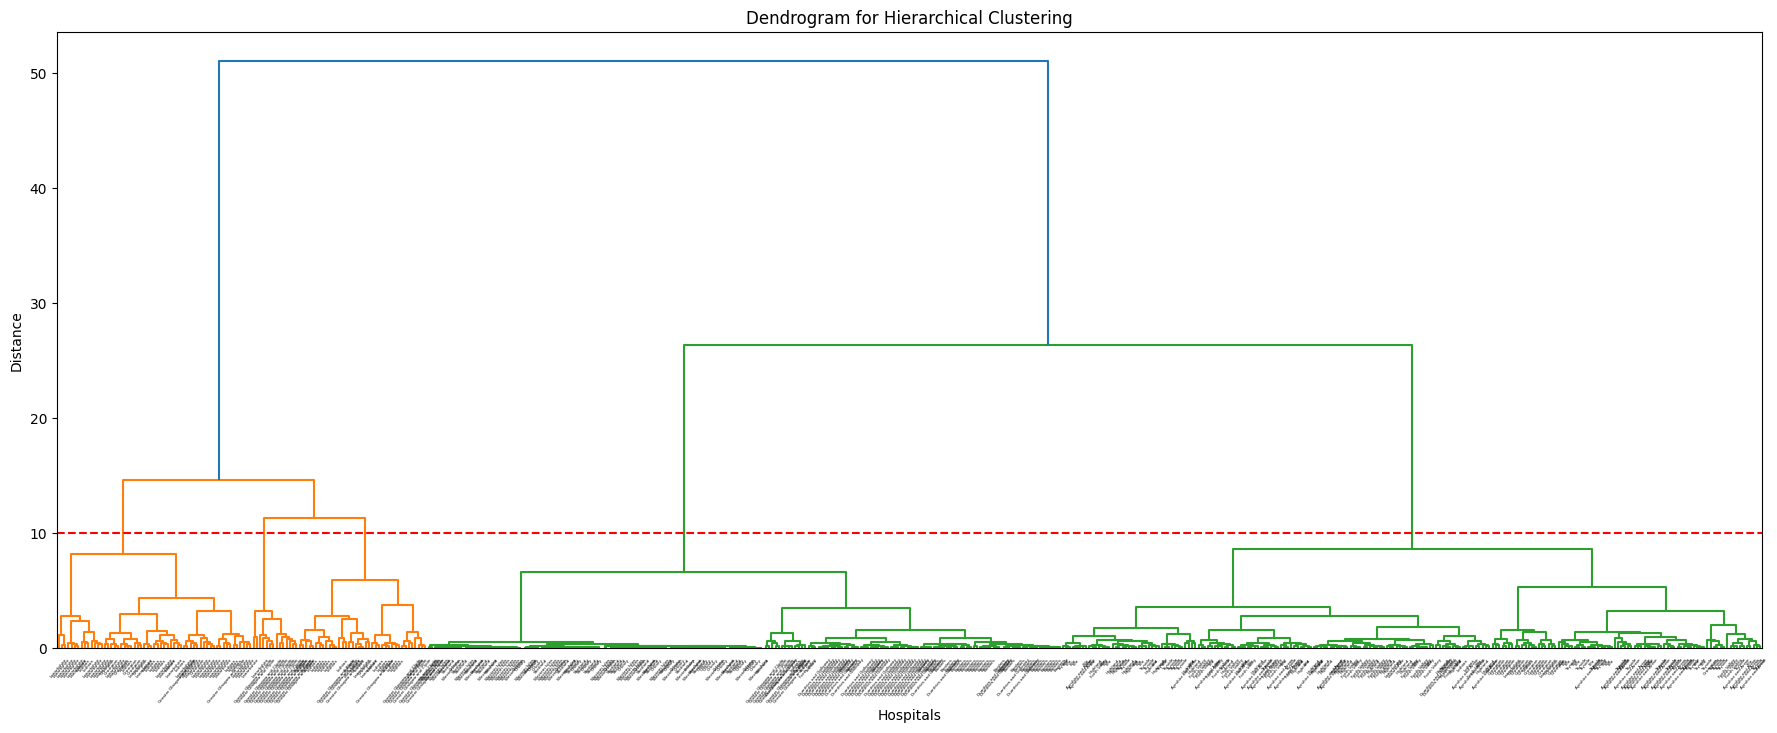

In [183]:
# Perform hierarchical clustering
linked = linkage(X_scaled, method='ward')

# Plot the dendrogram
plt.figure(figsize=(22, 8))
dendrogram(linked, labels=df['NameHospital'].values, leaf_rotation=50, leaf_font_size=3)
plt.axhline(y=10, color='r', linestyle='--')  # Adjust threshold if needed
plt.title("Dendrogram for Hierarchical Clustering")
plt.xlabel("Hospitals")
plt.ylabel("Distance")
plt.show()


In [184]:
# Choose a cluster threshold (adjust as needed)
num_clusters = 3  # Adjust based on dendrogram
df['Cluster'] = fcluster(linked, num_clusters, criterion='maxclust')

# Display hospitals and assigned clusters
print(df[['NameHospital', 'Cluster']].head(10))


  NameHospital  Cluster
0      Borders        2
1      Borders        2
2      Lothian        3
3      Lothian        2
4         Fife        3
5         Fife        3
6  Lanarkshire        1
7  Lanarkshire        1
8      Lothian        3
9      Lothian        2


In [185]:
# Count hospitals per cluster
print(df['Cluster'].value_counts())

# Check average BMI statistics per cluster
print(df.groupby("Cluster")[features].mean())


Cluster
3    212
2    192
1    112
Name: count, dtype: int64
         EpiUnderweight  EpiHealthyWeight  EpiOverweight    EpiObese
Cluster                                                             
1             59.633929       3009.526786     456.660714  396.821429
2              3.875000        266.171875      44.901042   35.869792
3             17.905660       1344.641509     224.594340  185.188679


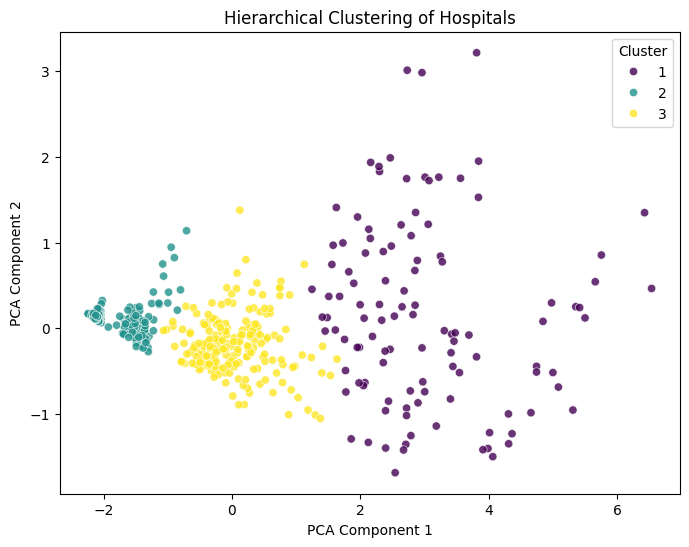

In [186]:
from sklearn.decomposition import PCA

# Reduce to 2 principal components
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Scatter plot of clusters
plt.figure(figsize=(8, 6))
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=df['Cluster'], palette='viridis', alpha=0.8)
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.title("Hierarchical Clustering of Hospitals")
plt.legend(title="Cluster")
plt.show()


In [187]:
bmi_features = ['EpiUnderweight', 'EpiHealthyWeight', 'EpiOverweight', 'EpiObese', 
                'EpiOverweightAndObese', 'ValidCounts', 'UnvalidCounts', 'TotalCounts']

# Compute correlation matrix
correlation_matrix = df[bmi_features].corr()

# Display correlation values
print(correlation_matrix)

                       EpiUnderweight  EpiHealthyWeight  EpiOverweight  \
EpiUnderweight               1.000000          0.795386       0.753651   
EpiHealthyWeight             0.795386          1.000000       0.985812   
EpiOverweight                0.753651          0.985812       1.000000   
EpiObese                     0.759861          0.969074       0.980778   
EpiOverweightAndObese        0.760214          0.982672       0.995758   
ValidCounts                  0.796534          0.999203       0.990403   
UnvalidCounts                0.760214          0.982672       0.995758   
TotalCounts                  0.791294          0.997850       0.992970   

                       EpiObese  EpiOverweightAndObese  ValidCounts  \
EpiUnderweight         0.759861               0.760214     0.796534   
EpiHealthyWeight       0.969074               0.982672     0.999203   
EpiOverweight          0.980778               0.995758     0.990403   
EpiObese               1.000000               0.9

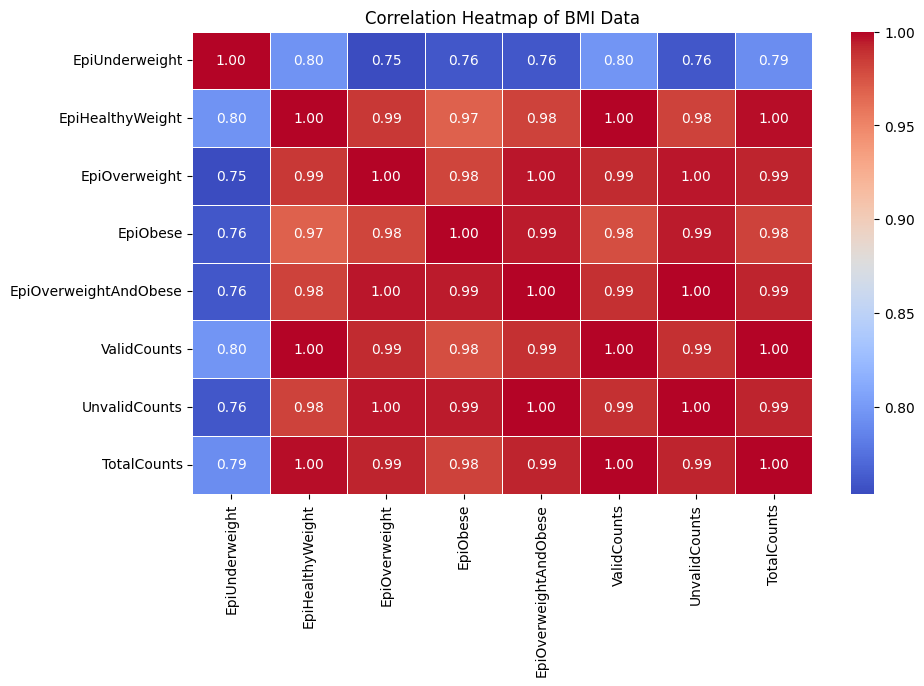

In [188]:
# Set figure size
plt.figure(figsize=(10, 6))

# Create a heatmap
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)

# Add title
plt.title("Correlation Heatmap of BMI Data")

# Show plot
plt.show()


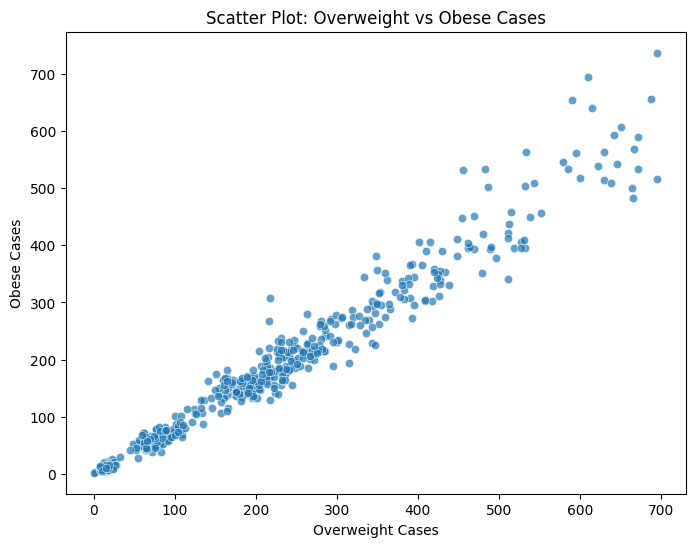

In [189]:
plt.figure(figsize=(8, 6))

sns.scatterplot(x=df["EpiOverweight"], y=df["EpiObese"], alpha=0.7)

plt.xlabel("Overweight Cases")
plt.ylabel("Obese Cases")
plt.title("Scatter Plot: Overweight vs Obese Cases")
plt.show()
